## Correlation/autocorrelation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-3, 3, 600)

In [34]:
def sig(x):
    return np.where(
        (((x > -2.25) & (x < -1.75)) |
        ((x > -.25) & (x < .25)) |
        ((x > 1.75) & (x < 2.25))),
        1., 0
    )

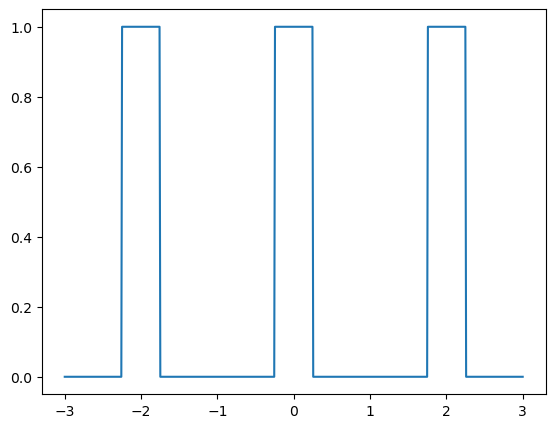

In [70]:
F, ax = plt.subplots(1, 1, figsize=(6.5, 5))
ax.plot(x, sig(x))

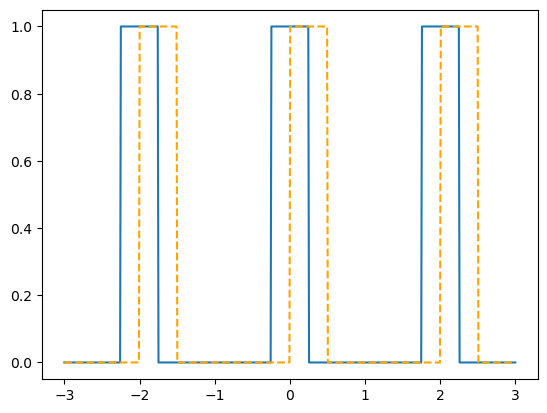

In [36]:
F, ax = plt.subplots(1, 1)
ax.plot(x, sig(x))
ax.plot(x, sig(x-0.25), color='orange', linestyle='dashed')

In [37]:
corr = np.correlate(sig(x), sig(x), 'same')

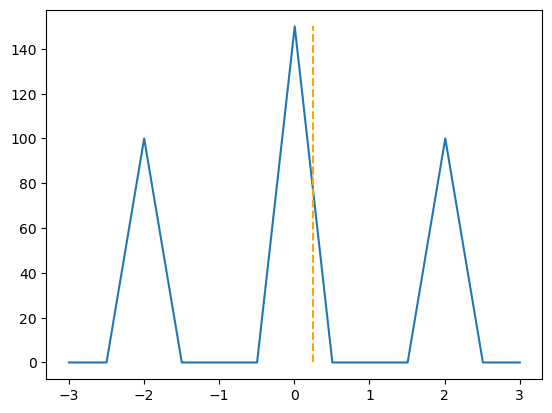

In [38]:
plt.plot(x, corr)
plt.plot([0.25, 0.25], [0, corr.max()], color='orange', linestyle='dashed')

In [68]:
for i, t in enumerate(x[::5]):
    F, ax = plt.subplots(1, 2, figsize=(13, 5))
    ax[0].plot(x, sig(x))
    ax[0].plot(x, sig(x-t), color='orange', linestyle='dashed')
    
    ax[1].plot(x, corr)
    ax[1].plot([t, t], [0, corr.max()], color='orange', linestyle='dashed')
    
    F.tight_layout()
    
    plt.savefig(f"C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/correlation_{i}.png")
    plt.close()

In [69]:
# Make a gif
import imageio
gif_fn = "C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/corr_gif.gif"
with imageio.get_writer(gif_fn, mode="I", fps=10) as writer:
    for i in range(len(x[::5])):
        writer.append_data(imageio.imread(f"C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/correlation_{i}.png"))

C:\Users\lande\AppData\Local\Temp\ipykernel_17760\2174999635.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(f"C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/correlation_{i}.png"))


## Wavelets

In [71]:
x = np.linspace(-1, 1, 800)

In [91]:
full_x = np.linspace(-10, 10, 8000)

In [92]:
edge = np.where(x > 0, -1., 1.)

In [115]:
f_edge = np.where(full_x > 0, -1., 1.)

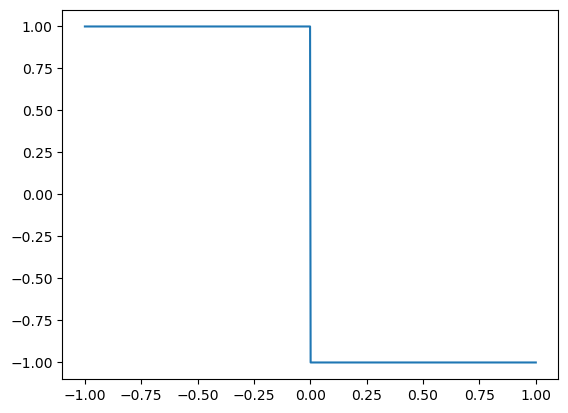

In [93]:
plt.plot(x, edge)

In [74]:
ridge = np.zeros(800)
ridge[:300] = -1
ridge[300:500] = 1.
ridge[500:] = -1

In [94]:
ridge = np.where((x > -.25) & (x < .25), 1., -1.)

In [117]:
f_ridge = np.where((full_x > -.25) & (full_x < .25), 1., -1.)

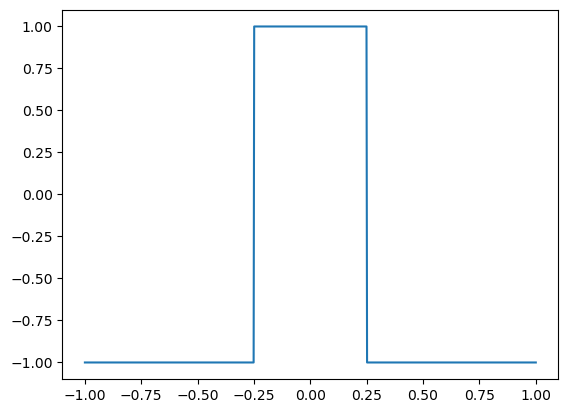

In [95]:
plt.plot(x, ridge)

In [105]:
def d_1_gauss(x, c=0.2):
    return -(x/c)*np.exp(-x**2/(2*(c**2))) / c # np.sqrt(c)

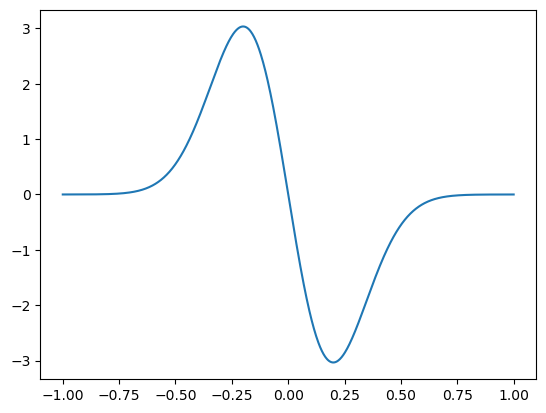

In [77]:
plt.plot(x, d_1_gauss(x, 0.2))

In [78]:
def d_2_gauss(x, c):
    return 1/c * (1 - c**(-2) * x**2) * np.exp(-x**2 / (2 * c**2))

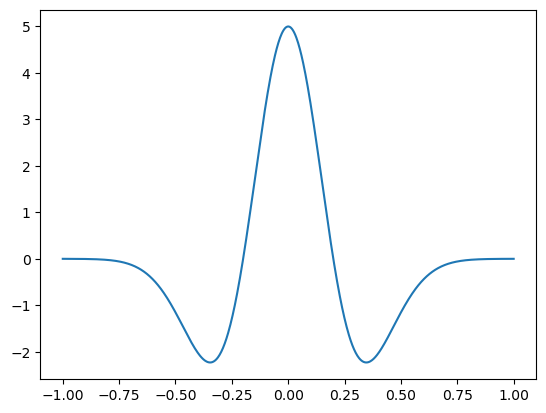

In [79]:
plt.plot(x, d_2_gauss(x, 0.2))

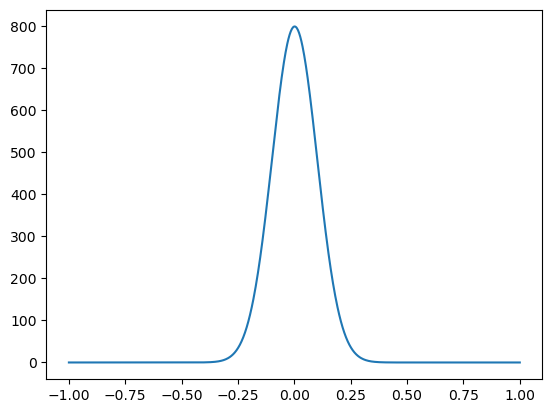

In [129]:
plt.plot(x, np.correlate(d_1_gauss(full_x, .1), f_edge, 'same')[3600:4400])

In [158]:
corr_1 = np.correlate(d_1_gauss(full_x, 0.2), f_edge, 'same')[3600:4400]
corr_2 = np.correlate(d_1_gauss(full_x, 0.3), f_edge, 'same')[3600:4400]
corr_3 = np.correlate(d_1_gauss(full_x, 0.4), f_edge, 'same')[3600:4400]

corr_4 = np.correlate(d_2_gauss(full_x, 0.2), f_edge, 'same')[3600:4400]
corr_5 = np.correlate(d_2_gauss(full_x, 0.3), f_edge, 'same')[3600:4400]
corr_6 = np.correlate(d_2_gauss(full_x, 0.4), f_edge, 'same')[3600:4400]

for i, t in enumerate(x[::5]):
    F, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax[0, 0].plot(x, edge)
    ax[0, 0].plot(x, d_1_gauss(x-t, 0.2), color='red', linestyle='dotted')
    ax[0, 0].plot(x, d_1_gauss(x-t, 0.3), color='green', linestyle='dashed')
    ax[0, 0].plot(x, d_1_gauss(x-t, 0.4), color='orange', linestyle='dashdot')
    ax[0, 0].set_ylim(-6, 6)
    ax[0, 0].set_xlabel('Edge and odd wavelets', fontsize=18)

    ax[0, 1].plot(x, corr_1, color='red', linestyle='dotted')
    ax[0, 1].plot(x, corr_2, color='green', linestyle='dashed')
    ax[0, 1].plot(x, corr_3, color='orange', linestyle='dashdot')
    ax[0, 1].plot([t, t], ax[0, 1].get_ylim(), color='black')
    ax[0, 1].set_xlabel('Wavelet coefficients', fontsize=18)
    
    ax[1, 0].plot(x, edge)
    ax[1, 0].plot(x, d_2_gauss(x-t, 0.2), color='red', linestyle='dotted')
    ax[1, 0].plot(x, d_2_gauss(x-t, 0.3), color='green', linestyle='dashed')
    ax[1, 0].plot(x, d_2_gauss(x-t, 0.4), color='orange', linestyle='dashdot')
    ax[1, 0].set_ylim(-6, 6)
    ax[1, 0].set_xlabel('Edge and even wavelets', fontsize=18)

    ax[1, 1].plot(x, corr_4, color='red', linestyle='dotted')
    ax[1, 1].plot(x, corr_5, color='green', linestyle='dashed')
    ax[1, 1].plot(x, corr_6, color='orange', linestyle='dashdot')
    ax[1, 1].plot([t, t], ax[1, 1].get_ylim(), color='black')
    ax[1, 1].set_xlabel('Wavelet coefficients', fontsize=18)

    F.tight_layout()
    
    plt.savefig(f'C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/wavelet_edge_{i}.png')
    plt.close()

In [159]:
corr_1 = np.correlate(d_1_gauss(full_x, 0.2), f_ridge, 'same')[3600:4400]
corr_2 = np.correlate(d_1_gauss(full_x, 0.3), f_ridge, 'same')[3600:4400]
corr_3 = np.correlate(d_1_gauss(full_x, 0.4), f_ridge, 'same')[3600:4400]

corr_4 = np.correlate(d_2_gauss(full_x, 0.2), f_ridge, 'same')[3600:4400]
corr_5 = np.correlate(d_2_gauss(full_x, 0.3), f_ridge, 'same')[3600:4400]
corr_6 = np.correlate(d_2_gauss(full_x, 0.4), f_ridge, 'same')[3600:4400]

for i, t in enumerate(x[::5]):
    F, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax[0, 0].plot(x, ridge)
    ax[0, 0].plot(x, d_1_gauss(x-t, 0.2), color='red', linestyle='dotted')
    ax[0, 0].plot(x, d_1_gauss(x-t, 0.3), color='green', linestyle='dashed')
    ax[0, 0].plot(x, d_1_gauss(x-t, 0.4), color='orange', linestyle='dashdot')
    ax[0, 0].set_ylim(-6, 6)
    ax[0, 0].set_xlabel('Ridge and odd wavelets', fontsize=18)

    ax[0, 1].plot(x, corr_1, color='red', linestyle='dotted')
    ax[0, 1].plot(x, corr_2, color='green', linestyle='dashed')
    ax[0, 1].plot(x, corr_3, color='orange', linestyle='dashdot')
    ax[0, 1].plot([t, t], ax[0, 1].get_ylim(), color='black')
    ax[0, 1].set_xlabel('Wavelet coefficients', fontsize=18)
    
    ax[1, 0].plot(x, ridge)
    ax[1, 0].plot(x, d_2_gauss(x-t, 0.2), color='red', linestyle='dotted')
    ax[1, 0].plot(x, d_2_gauss(x-t, 0.3), color='green', linestyle='dashed')
    ax[1, 0].plot(x, d_2_gauss(x-t, 0.4), color='orange', linestyle='dashdot')
    ax[1, 0].set_ylim(-6, 6)
    ax[1, 0].set_xlabel('Ridge and even wavelets', fontsize=18)

    ax[1, 1].plot(x, corr_4, color='red', linestyle='dotted')
    ax[1, 1].plot(x, corr_5, color='green', linestyle='dashed')
    ax[1, 1].plot(x, corr_6, color='orange', linestyle='dashdot')
    ax[1, 1].plot([t, t], ax[1, 1].get_ylim(), color='black')
    ax[1, 1].set_xlabel('Wavelet coefficients', fontsize=18)

    F.tight_layout()
    
    plt.savefig(f'C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/wavelet_ridge_{i}.png')
    plt.close()

In [162]:
# Make a gif
import imageio
gif_fn = "C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/wavelet_edge.mp4"
with imageio.get_writer(gif_fn, mode="I", fps=10) as writer:
    for i in range(len(x[::5])):
        writer.append_data(imageio.imread(f"C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/wavelet_edge_{i}.png"))
        
gif_fn = "C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/wavelet_ridge.mp4"
with imageio.get_writer(gif_fn, mode="I", fps=10) as writer:
    for i in range(len(x[::5])):
        writer.append_data(imageio.imread(f"C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/wavelet_ridge_{i}.png"))

C:\Users\lande\AppData\Local\Temp\ipykernel_17760\2148183003.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(f"C:/Users/lande/OneDrive/Documents/talks/2023_02_23_defense/figures/animation/wavelet_edge_{i}.png"))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1200, 1000) to (1200, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
C:\Users\lande\AppData\Local\Temp\ipykernel_17760\2148183003.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make t

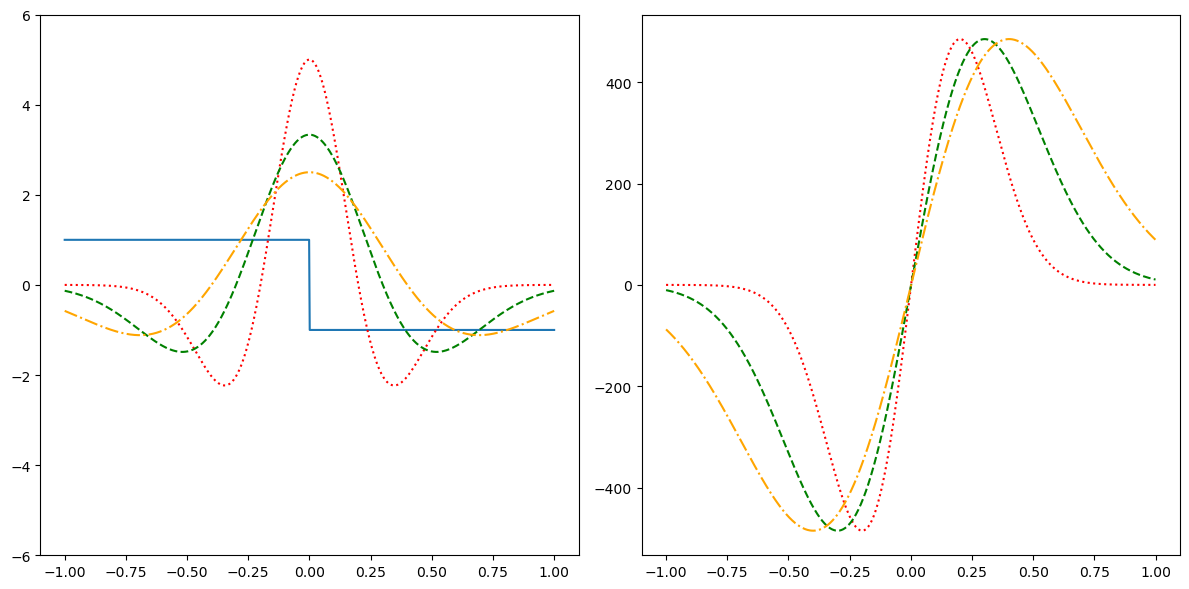

In [142]:
F, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, edge)
ax[0].plot(x, d_2_gauss(x, 0.2), color='red', linestyle='dotted')
ax[0].plot(x, d_2_gauss(x, 0.3), color='green', linestyle='dashed')
ax[0].plot(x, d_2_gauss(x, 0.4), color='orange', linestyle='dashdot')
ax[0].set_ylim(-6, 6)

ax[1].plot(x, np.correlate(d_2_gauss(full_x, 0.2), f_edge, 'same')[3600:4400], color='red', linestyle='dotted')
ax[1].plot(x, np.correlate(d_2_gauss(full_x, 0.3), f_edge, 'same')[3600:4400], color='green', linestyle='dashed')
ax[1].plot(x, np.correlate(d_2_gauss(full_x, 0.4), f_edge, 'same')[3600:4400], color='orange', linestyle='dashdot')

F.tight_layout()

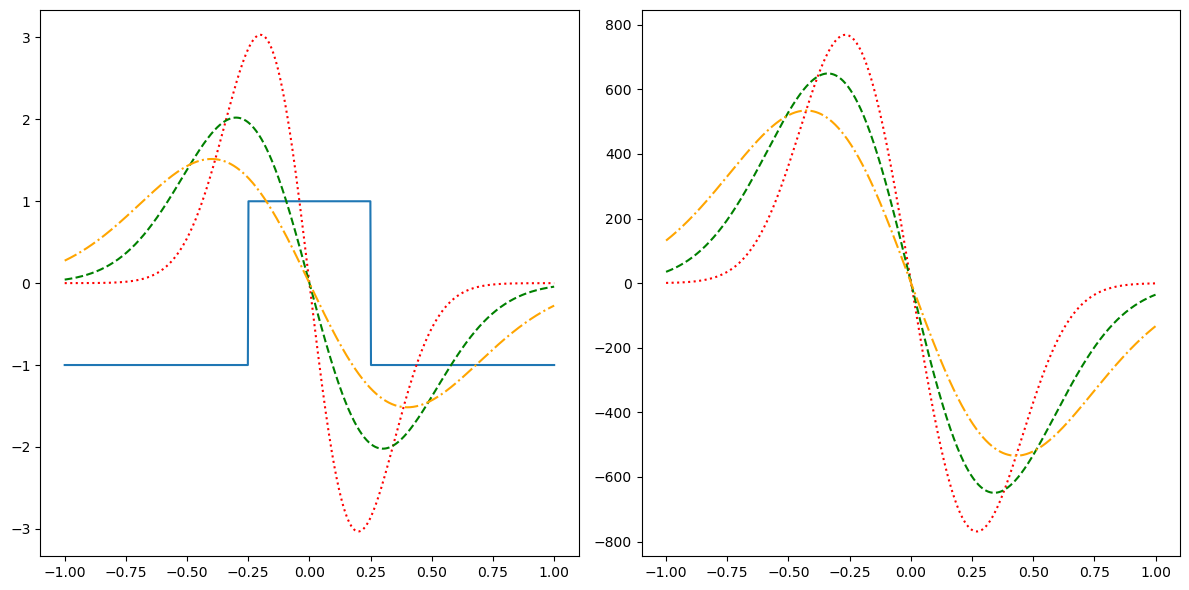

In [138]:
F, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, ridge)
ax[0].plot(x, d_1_gauss(x, 0.2), color='red', linestyle='dotted')
ax[0].plot(x, d_1_gauss(x, 0.3), color='green', linestyle='dashed')
ax[0].plot(x, d_1_gauss(x, 0.4), color='orange', linestyle='dashdot')

ax[1].plot(x, np.correlate(d_1_gauss(full_x, 0.2), f_ridge, 'same')[3600:4400], color='red', linestyle='dotted')
ax[1].plot(x, np.correlate(d_1_gauss(full_x, 0.3), f_ridge, 'same')[3600:4400], color='green', linestyle='dashed')
ax[1].plot(x, np.correlate(d_1_gauss(full_x, 0.4), f_ridge, 'same')[3600:4400], color='orange', linestyle='dashdot')

F.tight_layout()

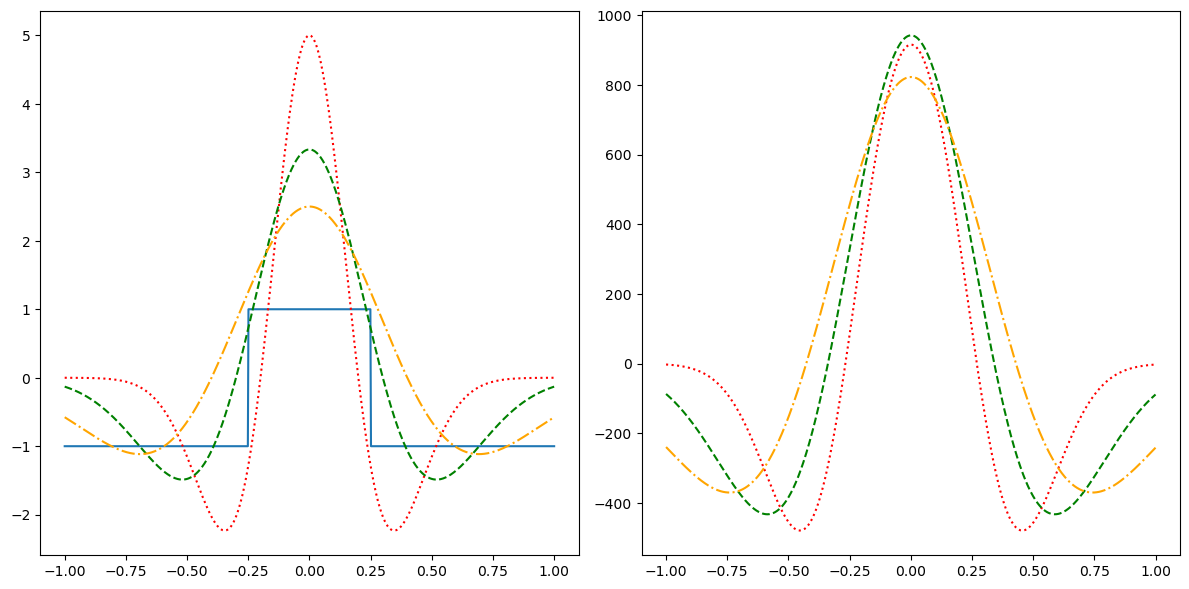

In [139]:
F, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, ridge)
ax[0].plot(x, d_2_gauss(x, 0.2), color='red', linestyle='dotted')
ax[0].plot(x, d_2_gauss(x, 0.3), color='green', linestyle='dashed')
ax[0].plot(x, d_2_gauss(x, 0.4), color='orange', linestyle='dashdot')

ax[1].plot(x, np.correlate(d_2_gauss(full_x, 0.2), f_ridge, 'same')[3600:4400], color='red', linestyle='dotted')
ax[1].plot(x, np.correlate(d_2_gauss(full_x, 0.3), f_ridge, 'same')[3600:4400], color='green', linestyle='dashed')
ax[1].plot(x, np.correlate(d_2_gauss(full_x, 0.4), f_ridge, 'same')[3600:4400], color='orange', linestyle='dashdot')

F.tight_layout()

## FRT

In [7]:
import numpy as np
from frat import frt
import matplotlib.pyplot as plt

In [2]:
fig_frt = frt()

In [143]:
blank_img = np.zeros((13, 13))

In [144]:
fig_frt.fit(blank_img)

[]

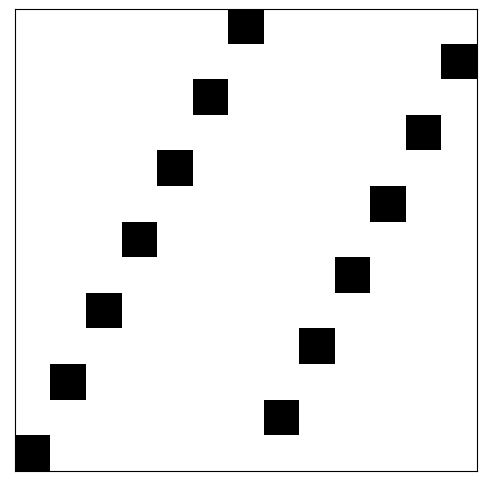

In [161]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))

n_vec = fig_frt.n_vecs[2]

lines_ex = np.empty((13, 13))
# first_col = np.arange(149)[::-1]
first_col = np.zeros(13)
first_col[-1] = 1
if n_vec[1] != 0:
    lines_ex[:, 0] = first_col
    x_step = n_vec[1]
    y_step = -n_vec[0]
    for i in range(1, 13):
        lines_ex[:, int(i * x_step) % 13] = np.roll(first_col, -int(i * y_step) % 13)
        
ax.imshow(lines_ex, alpha=lines_ex, cmap='gray_r')
ax.set_xticks([])
ax.set_yticks([])

In [3]:
fig_frt_2 = frt()

In [4]:
blank_img = np.zeros((149, 149))

In [5]:
fig_frt_2.fit(blank_img)

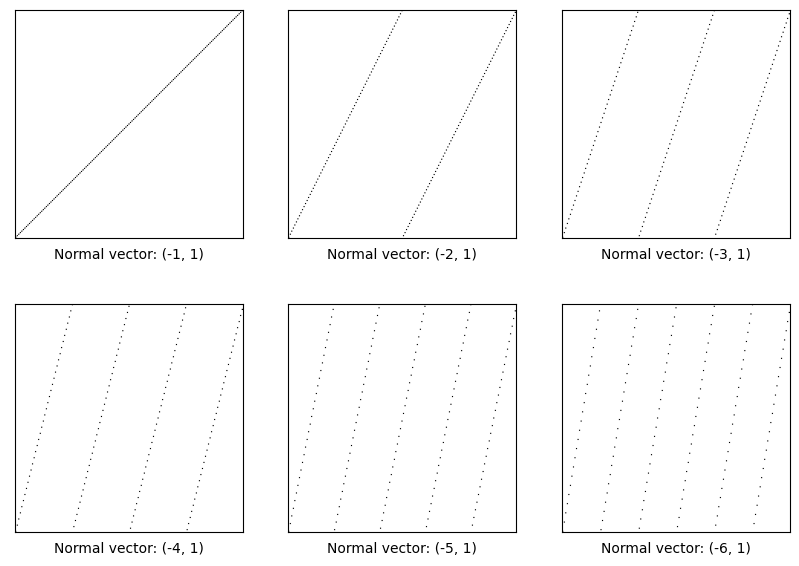

In [85]:
F, axs = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(np.ravel(axs)):
    n_vec = fig_frt_2.n_vecs[i+1]

    lines_ex = np.empty((149, 149))
    # first_col = np.arange(149)[::-1] / 149
    first_col = np.zeros(149)
    first_col[-1] = 1
    if n_vec[1] != 0:
        lines_ex[:, 0] = first_col
        x_step = n_vec[1]
        y_step = -n_vec[0]
        for i in range(1, 149):
            lines_ex[:, int(i * x_step) % 149] = np.roll(first_col, -int(i * y_step) % 149)

    ax.imshow(lines_ex, alpha=lines_ex, cmap='gray_r')
    ax.set_xlabel(f'Normal vector: ({n_vec[0]:1.0f}, {n_vec[1]:1.0f})')
    ax.set_xticks([])
    ax.set_yticks([])

In [81]:
fig_frt_2.n_vecs[1]

[-1.0, 1.0]